In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Preprocess_Completed.csv')
mae = data.loc[data['Department'] == 'MAE']
mae["student ratio"] = (mae["Evals Made"]/mae["Enroll"]) *100

C:\Users\TonyY\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
mae.head()

,Department,Course Number,Instructor,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,student ratio
2728,MAE,MAE 1,"Bahadori, Mohammad Yousef",FA07,213,119,63.2,79.3,3.96,3.27,2.87,55.868545
2729,MAE,MAE 1,"Linden, Paul F.",FA07,213,119,63.2,79.3,3.96,3.27,2.87,55.868545
2730,MAE,MAE 1,"Nagy, Geza",FA07,213,119,63.2,79.3,3.96,3.27,2.87,55.868545
2731,MAE,MAE 101A,"Bahadori, Mohammad Yousef",FA14,55,25,96.0,96.0,6.42,3.13,2.36,45.454545
2732,MAE,MAE 101A,"Bahadori, Mohammad Yousef",S112,50,13,92.3,84.6,9.58,3.23,2.69,26.000000


In [7]:
unique_course = mae.groupby('Course Number')  # groupby each course
data = {}
for course_num, table1 in unique_course:
    fall = table1.loc[mae['Term'].str.startswith('FA')]  # find all current course open in fall
    winter = table1.loc[mae['Term'].str.startswith('WI')]  # find all current course open in winter
    spring = table1.loc[mae['Term'].str.startswith('SP')]  # find all current course open in spring
    summer = table1.loc[mae['Term'].str.startswith('S1')]  # find all current course open in summer
    if fall.empty or winter.empty or spring.empty or summer.empty:  # if not open in all four quarter
        continue
    data[course_num] = [fall['Avg Grade Received'].mean(), winter['Avg Grade Received'].mean(), spring['Avg Grade Received'].mean(), summer['Avg Grade Received'].mean()]
compare_gpa = pd.DataFrame(data, index=['FA', 'WI', 'SP', 'S1']).transpose()
compare_gpa

,FA,WI,SP,S1
MAE 105,2.971538,3.170000,2.995000,3.193333
MAE 130A,2.780833,3.095385,3.050000,3.073750
MAE 130B,2.280000,2.800000,3.047692,2.820000
MAE 131A,3.147500,2.768889,2.975000,3.330000
MAE 143A,2.660000,2.996429,2.730000,3.040000
MAE 150,2.829231,2.670000,2.854545,2.970000
MAE 20,2.966667,3.180000,3.460000,3.615000
MAE 8,3.180000,3.195000,3.173750,3.368000


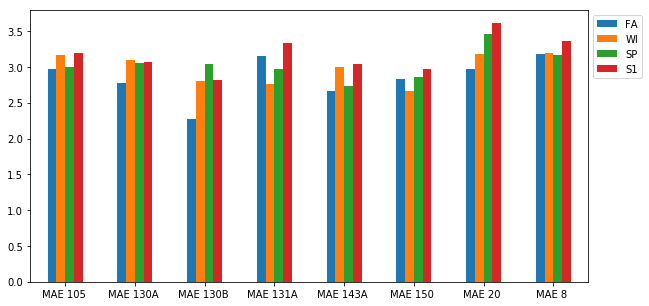

In [9]:
compare_gpa.plot.bar(rot = 0, figsize=(10,5)).legend(bbox_to_anchor=(1, 1))